In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split


from datetime import date, timedelta
import yfinance as yf #Alternative package if webreader does not work: pip install yfinance
import numpy as np # Fundamental package for scientific computing with Python
import joblib
from lib.Measures import measureDataframe2
from lib.Utility import exportExcelWithTimeStamp, getData, computeEquity
import plotly.express as px
from plotly import graph_objects as go
# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

commissioni = 0.0005
threshold = 0.5
features2 = ['feat_Open-PrevClose']
features = ['feat_Open-PrevClose', 'feat_vixOpen', 'feat_vixPrevClose', 'feat_vvixOpen', 'feat_vvixPrevClose']
bigbodyRangeValue = 0.0085

## Migliorie
- Overnight?
- 

In [2]:
data = getData(bigbodyRangeValue)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# features = [col for col in data.columns if 'feat' in col]

print(features)

x_train, x_test, y_train, y_test = train_test_split(data[features], data['Cluster'], test_size= 0.3, random_state= 1,shuffle=True)

x_train = x_train.sort_index()
x_test = x_test.sort_index()
y_train= y_train.sort_index()
y_test = y_test.sort_index()


# x_train2, x_test2, y_train2, y_test2 = train_test_split(data[features2], data['Cluster'], test_size= 0.3, random_state= 1,shuffle=True)

# x_train2 = x_train2.sort_index()
# x_test2 = x_test2.sort_index()
# y_train2= y_train2.sort_index()
# y_test2 = y_test2.sort_index()


print (f'X_train: {x_train.shape} \nX_test: {x_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

['feat_Open-PrevClose', 'feat_vixOpen', 'feat_vixPrevClose', 'feat_vvixOpen', 'feat_vvixPrevClose']
X_train: (3075, 5) 
X_test: (1318, 5) 
y_train: (3075,) 
y_test: (1318,)


In [4]:
# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear", random_state=42).fit(x_train, y_train)
# model2 = LogisticRegression(C=1/reg, solver="liblinear", random_state=42).fit(x_train2, y_train2)

joblib.dump(model, "./BigShort.joblib")
# joblib.dump(model2, "./LogRegB-Class22.joblib")

print (model)

LogisticRegression(C=100.0, random_state=42, solver='liblinear')


In [5]:
df = x_test.copy()

df['predictions'] = model.predict(x_test.sort_index())
df['y_test'] = y_test


# df2 = x_test2.copy()
# df2['predictions'] = model2.predict(x_test2)
# df2['y_test'] = y_test2

print(f"Accuracy score: {accuracy_score(df['y_test'], df['predictions'])}")
# print(f"Accuracy score: {accuracy_score(df2['y_test'], df2['predictions'])}")

# df3 = pd.DataFrame(model.predict_proba(x_test))
# df5 = pd.DataFrame(model2.predict_proba(x_test2))
# df = pd.concat([df, df3])
# df2 = pd.concat([df, df5])
# print(df)
# df.to_excel('pippo.xlsx')


Accuracy score: 0.8770864946889226


Equity: 1421.204189025879


C:\Users\vitto\AppData\Local\Temp\ipykernel_23924\2473226664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['cluster'] = model.predict(x_test)


Misure per 5.491666666666666 anni
Benchmark Equity: -543.2471313476562
Equity 1421.204189025879
Maximum number of loss operation: 1
Maximum DrawDown: -190.99627929687495
SGR: 258.79287205327086 vs Benchmark: -98.92208765055956
Win Rate: 79.24528301886792
Long Equity 0.0
Short Equity 1477.7098388671875
Numero di Eseguiti 53


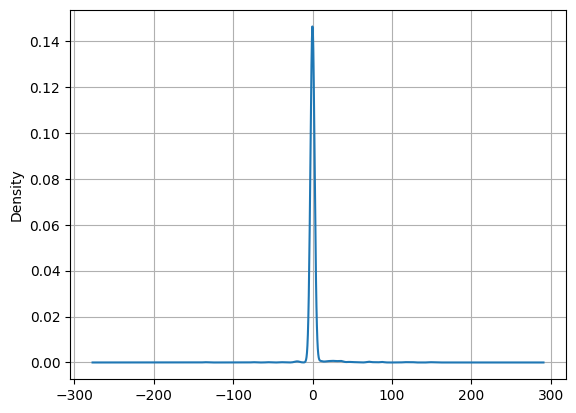

In [6]:

# Seleziona le colonne con il prefisso "feat"
feat_cols = [col for col in data.columns if 'feat' in col]

test_data = data[data.index.isin(x_test.index)]

test_data['cluster'] = model.predict(x_test)

text_pred_prob = model.predict_proba(x_test)

df_test = computeEquity(test_data, commissioni, feat_cols, text_pred_prob)
df_test['color'] = np.where(test_data['cluster']==1,'green','red')
#print(df_test)
# test_data['cluster2'] = model2.predict(x_test2)

# df3 = pd.DataFrame(model.predict_proba(x_test))
# df3.index = test_data.index
# test_data = test_data.merge(df3, left_index=True, right_index=True)

# df_test = pd.DataFrame(test_data)
# df_test['color'] = np.where(test_data['cluster']==1,'green','red')

# # Calcoliamo la variazione percentuale dei prezzi di chiusura
# #df_live['pct_change'] = df_live['Close'].pct_change()
# df_test['pct_change'] = (df_test['Close']-df_test['Open'])#/df_live['Open']

# df_test['commissione'] = commissioni*df_test['Open']

# # df_live['gainVolFilter'] = np.where(df_live['bigBodyRangePred'] == 1, (df_live['signal']*df_live['pct_change'])-commissioni, 0)


# # df_test['signal'] = np.where((df_test[0] >= threshold) & (df_test['cluster2'] == -1), -1, np.where((df_test[1] >= threshold) & (df_test['cluster2'] == 1), 1, 0))
# # df_test['signal'] = np.where((df_test[0] >= threshold) , -1, np.where((df_test[1] >= threshold), 1, 0))
# df_test['signal'] = np.where((df_test[0] >= threshold) , -1, 0)

# df_test['longGain'] = np.where(df_test['signal'] == 1,df_test['signal']*df_test['pct_change'], 0)
# df_test['shortGain'] = np.where(df_test['signal'] == -1, df_test['signal']*df_test['pct_change'], 0) 

# df_test['gain'] = (df_test['signal']*df_test['pct_change'])-df_test['commissione']*abs(df_test['signal'])
# df_test['equity'] = np.cumsum(df_test['gain'])
# # df_test['signal'] = np.where(df_test['cluster'] == 1, 1, np.where(df_test['cluster'] == -1, -1, 0))
# # df_test['gain'] = (df_test['cluster']*df_test['pct_change'])-df_test['commissione']
# # df_test['equity'] = np.cumsum(df_test['gain'])
# # df_live['equityVolatilityFilter'] = np.cumsum(df_live['gainVolFilter'])

measureDataframe2(df_test)
exportExcelWithTimeStamp(df_test, "Equity/", "TestEquity.xlsx")



fig = go.Figure(data=[go.Candlestick(x=test_data['Date'],
                open=test_data['Open'],
                close=test_data['Close'], high=test_data['High'], low=test_data['Low'], opacity=0.5)])
sec_y = go.layout.YAxis(title='Equity')#, offset=dict(type="absolute", value=0.25))
fig.add_trace(go.Scatter(x=df_test['Date'], y=df_test['equity'], name='Equity', line=dict(color='blue')) )
fig.add_scatter(x=test_data['Date'], y=test_data['Open'], mode='markers',marker=dict(color=df_test['color']))
# fig.add_trace(go.Line(x=df['Date'], y=df['equity'], name='Equity'))
# fig.add_trace(go.Scatter(x=df_live['Date'], y=df_live['equityVolatilityFilter'], name='Equity Volatility Filter'))




fig.update_layout(
    xaxis_rangeslider_visible=False,
                  yaxis2=dict(
        title='Equity',
        overlaying='y',  # Sovrappone il secondo asse y al primo
        side='right',  # Posiziona il secondo asse y a destra
        showgrid=False  # Nasconde la griglia per il secondo asse y se necessario
    ))
# Associa la serie Equity al secondo asse y
fig.data[1].update(yaxis='y2')
fig.show()

# Plot distribution of values in Marks column
df_test['gain'].plot(kind='kde')
plt.grid()

## LIVE

In [7]:
before = date.today() - timedelta(400)
tomorrow = date.today() + timedelta(1)

dataLive = yf.download (tickers = "^SPX", start = before,
                              end = tomorrow, interval = "1d").reset_index()
vixLive = yf.download (tickers = "^VIX", start = before,
                              end = tomorrow, interval = "1d").reset_index()
vvixLive = yf.download (tickers = "^VVIX", start = before,
                              end = tomorrow, interval = "1d").reset_index()

scaler = preprocessing.MinMaxScaler()
dataLive['feat_Open'] = scaler.fit_transform(dataLive['Open'].values.reshape(-1, 1))
dataLive['feat_Open-PrevClose'] = np.where(dataLive['Open']-dataLive['Close'].shift(1)>0,1,0)
vixLive['feat_vixOpen'] = vixLive['Open']
vixLive['feat_vixPrevClose'] = vixLive['Close'].shift(1)
vvixLive['feat_vvixOpen'] = vvixLive['Open']
vvixLive['feat_vvixPrevClose'] = vvixLive['Close'].shift(1)
vvixLive['feat_vvixPrevLow'] = vvixLive['Low'].shift(1)
#data['feat_VolChange'] = (data['Volume'].shift(1) - data['Volume'].shift(2)) / data['Volume'].shift(2)
# data['feat_prevClose'] = data['Close'].shift(1)
# data['bigBodyRange'] = np.where(abs(data['Close'] - data['Open'])/data['Open'] > 0.004, 1, 0)
vvixLive['feat_vvixPrevOpen'] = vvixLive['Open'].shift(1)
vvixLive['feat_vvixPrevHigh'] = vvixLive['High'].shift(1)
vvixLive['feat_vvixPrevHigh-Low'] = vvixLive['High'].shift(1)-vvixLive['Low'].shift(1)
vvixLive['feat_Acc'] = np.where(vvixLive['Close'].shift(1) > vvixLive['Close'].shift(2), 1, 0)
vixLive = vixLive.drop(['Open','Close', 'High','Low', 'Adj Close', 'Volume'], axis=1)
vvixLive = vvixLive.drop(['Open','Close', 'High','Low', 'Adj Close', 'Volume'], axis=1)

dataLive['feat_Open'] = dataLive['Open']
dataLive = dataLive.merge(vixLive, how='left', on='Date')# VIX
dataLive = dataLive.merge(vvixLive, how='left', on='Date')# vVIX

dataLive['Cluster'] = np.where(dataLive['Close'] > dataLive['Open'], 1, -1)
# dataLive['Cluster'] = np.where(dataLive['Close'] > dataLive['Open']+dataLive['Open']*0.001, 1, np.where(dataLive['Close'] < dataLive['Open']-dataLive['Open']*0.001, -1,0))
dataLive['feat_PrevCluster'] = dataLive['Cluster'].astype('Int64').shift(1)
dataLive['feat_bigBodyRange'] = np.where(abs(dataLive['Close'] - dataLive['Open'])/dataLive['Open'] > 0.01, 1, 0)



dataLive =dataLive.dropna()
# dataLive.head(15)
vvixLive.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,feat_vvixOpen,feat_vvixPrevClose,feat_vvixPrevLow,feat_vvixPrevOpen,feat_vvixPrevHigh,feat_vvixPrevHigh-Low,feat_Acc
271,2024-07-26,101.099998,104.379997,95.540001,104.220001,109.660004,14.120003,0
272,2024-07-29,96.349998,94.610001,93.870003,101.099998,101.529999,7.659996,0
273,2024-07-30,92.540001,93.510002,92.750000,96.349998,97.709999,4.959999,0
274,2024-07-31,93.769997,99.970001,92.430000,92.540001,101.849998,9.419998,1
275,2024-08-01,94.000000,94.250000,87.980003,93.769997,95.470001,7.489998,0


In [8]:
# CLASSIFICATION
clf = loaded_rf = joblib.load("./BigShort.joblib")

# Seleziona le colonne con il prefisso "feat"
# features = [col for col in data.columns if 'feat' in col]
# features = ['feat_Open', 'feat_vixOpen', 'feat_vixPrevClose', 'feat_vvixOpen', 'feat_Acc', 'feat_bigBodyRange']
print(features)

x_live = dataLive[features]

y_live_pred = clf.predict(x_live)
dataLive['cluster'] = y_live_pred

print(f"Accuracy score: {accuracy_score(dataLive['Cluster'], dataLive['cluster'])}")

df4 = pd.DataFrame(model.predict_proba(x_live))
df4.index = dataLive.index
dataLive = dataLive.merge(df4, left_index=True, right_index=True)

df_live = pd.DataFrame(dataLive)
# dataLive['signal'] = np.where(dataLive['cluster'] == 1, 1, np.where(dataLive['cluster'] == 0, -1, 0)) 
dataLive['color'] = np.where(dataLive['cluster']==1,'green','red')


# Calcoliamo la variazione percentuale dei prezzi di chiusura
#df_live['pct_change'] = df_live['Close'].pct_change()
df_live['pct_change'] = (df_live['Close']-df_live['Open'])#/df_live['Open']
# df_live['signal'] = np.where(df_live['cluster'] == 1, 1, np.where(df_live['cluster'] == -1, -1, 0)) 
df_live['commissione'] = abs(df_live['cluster'])*commissioni*df_live['Open']

# df_live['gainVolFilter'] = np.where(df_live['bigBodyRangePred'] == 1, (df_live['signal']*df_live['pct_change'])-commissioni, 0)


# df_live['gain'] = (df_live['
# ']*df_live['pct_change'])-df_live['commissione']
# df_live['equity'] = np.cumsum(df_live['gain'])
# df_live['equityVolatilityFilter'] = np.cumsum(df_live['gainVolFilter'])
# df_live['signal'] = np.where(df_live[0] >= threshold, -1, np.where(df_live[1] >= threshold, 1, 0))
df_live['signal'] = np.where((df_live[0] >= threshold) , -1, 0)

df_live['longGain'] = np.where(df_live['signal'] == 1, (df_live['signal']*df_live['pct_change']), 0)
df_live['shortGain'] = np.where(df_live['signal'] == -1, (df_live['signal']*df_live['pct_change']), 0)  

df_live['gain'] = (df_live['signal']*df_live['pct_change'])-df_live['commissione']*abs(df_live['signal'])
df_live['equity'] = np.cumsum(df_live['gain'])

measureDataframe2(df_live)

exportExcelWithTimeStamp(df_live, "Equity/", "LiveEquity.xlsx")

# LIVE

fig = go.Figure(data=[go.Candlestick(x=df_live['Date'],
                open=df_live['Open'],
                close=df_live['Close'], high=df_live['High'], low=df_live['Low'], opacity=0.5)])
# sec_y = go.layout.YAxis(title='Equity')#, offset=dict(type="absolute", value=0.25))

# fig.add_trace(go.Line(x=df_live['Date'], y=df_live['equity'], name='Equity'))
fig.add_trace(go.Scatter(x=df_live['Date'], y=df_live['equity'], name='Equity', line=dict(color='blue')) )
fig.add_scatter(x=df_live['Date'], y=df_live['Open'], mode='markers',marker=dict(color=dataLive['color']))

fig.update_layout(
    xaxis_rangeslider_visible=False,
                  yaxis2=dict(
        title='Equity',
        overlaying='y',  # Sovrappone il secondo asse y al primo
        side='right',  # Posiziona il secondo asse y a destra
        showgrid=False  # Nasconde la griglia per il secondo asse y se necessario
    ))
# Associa la serie Equity al secondo asse y
fig.data[1].update(yaxis='y2')
fig.show()

c:\Users\vitto\OneDrive\Desktop\Personale\Machine Learning\Exploration\lib\Measures.py:117: RuntimeWarning:

invalid value encountered in scalar divide



['feat_Open-PrevClose', 'feat_vixOpen', 'feat_vixPrevClose', 'feat_vvixOpen', 'feat_vvixPrevClose']
Accuracy score: 0.5636363636363636
Misure per 1.1458333333333333 anni
Benchmark Equity: 211.8134765625
Equity 0.0
Maximum number of loss operation: 0
Maximum DrawDown: 0.0
SGR: 0.0 vs Benchmark: 184.85539772727273
Win Rate: nan
Long Equity 0.0
Short Equity 0.0
Numero di Eseguiti 0
